## Assignment for Unsupervised Learning
<b>Name: Preneeth O <br>
Batch: 11</b>

## Introduction##

This assignment is to implement PCA for dimensionality reduction and check the performance of the models.

Dataset: <a https://olympus.greatlearning.in/courses/6627/files/359306/download?wrap=1> vehicle.csv </a>

### Step 1: Import all the necessary libraries

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sn.set(color_codes = True)

#### Read data from CSV from file

In [2]:
dataSet = pd.read_csv('vehicle.csv')
dataSet.head()


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Step 2: Basic EDA
* Find the shape of the data & various columns
* Understand the data and their relationship between independent features
* Check the presence of missing values
* Find the distribution of numerical columns and presence of outliers 

In [3]:
#Shape and column names
print(dataSet.shape)
print (list(dataSet.columns))

(846, 19)
['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']


<b>Findings:</b> There are 846 rows and 19 columns

In [4]:
#Rename column names which has dot in names for ease of use.
dataSet = dataSet.rename(columns={'pr.axis_aspect_ratio':'pr_axis_aspect_ratio', \
                          'max.length_aspect_ratio': 'max_length_aspect_ratio', \
                          'pr.axis_rectangularity': 'pr_axis_rectangularity',\
                          'max.length_rectangularity' : 'max_length_rectangularity', \
                          'scaled_variance.1' : 'scaled_variance_1', \
                          'scaled_radius_of_gyration.1' : 'scaled_radius_of_gyration_1', \
                          'skewness_about.1' : 'skewness_about_1', \
                          'skewness_about.2' : 'skewness_about_2',\
                           'class' : 'target_class'})

In [5]:
# Check the five point summary of the data
dataSet.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr_axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max_length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr_axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max_length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance_1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration_1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about_1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about_2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr_axis_aspect_ratio          61.0   65.0   138.0  
max_length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr_axis_rectangularity        20.0   23.0    29.0  
max_length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance_1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration_1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about_1              11.0   19.0    41.0  
skewness_about_2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

<b>Findings:</b> 
    * The count of all columns is not same that means there are missing values in few columns.
    * scaled_variance, scaled_variance_1, scaled_radius_of_gyration, scaled_radius_of_gyration_1, skewness_about, skewness_about_1 the 75% value and Max value there is huge gap that means the gaussian is right skewed and there could be outliers. 	

In [6]:
# Check the datatypes.
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr_axis_aspect_ratio           844 non-null float64
max_length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr_axis_rectangularity         843 non-null float64
max_length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance_1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration_1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about_1               845 non-null float64
skewness_about_2               845 non-null float64
hollows_ratio    

<b>Findings:</b> 
* There are 18 numerical columns 
* 1 categorical column (class) of type Text. It is the target column.
* There are missing values in few columns, need to futher analyze for missing values

In [7]:
#Convert target class column into codes for pairplot to work
dataSet.target_class = pd.Categorical(dataSet.target_class).codes
#dataSet.target_class = dataSet.target_class.astype('category')

### Step 2.1: Find corelation between columns/features

/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


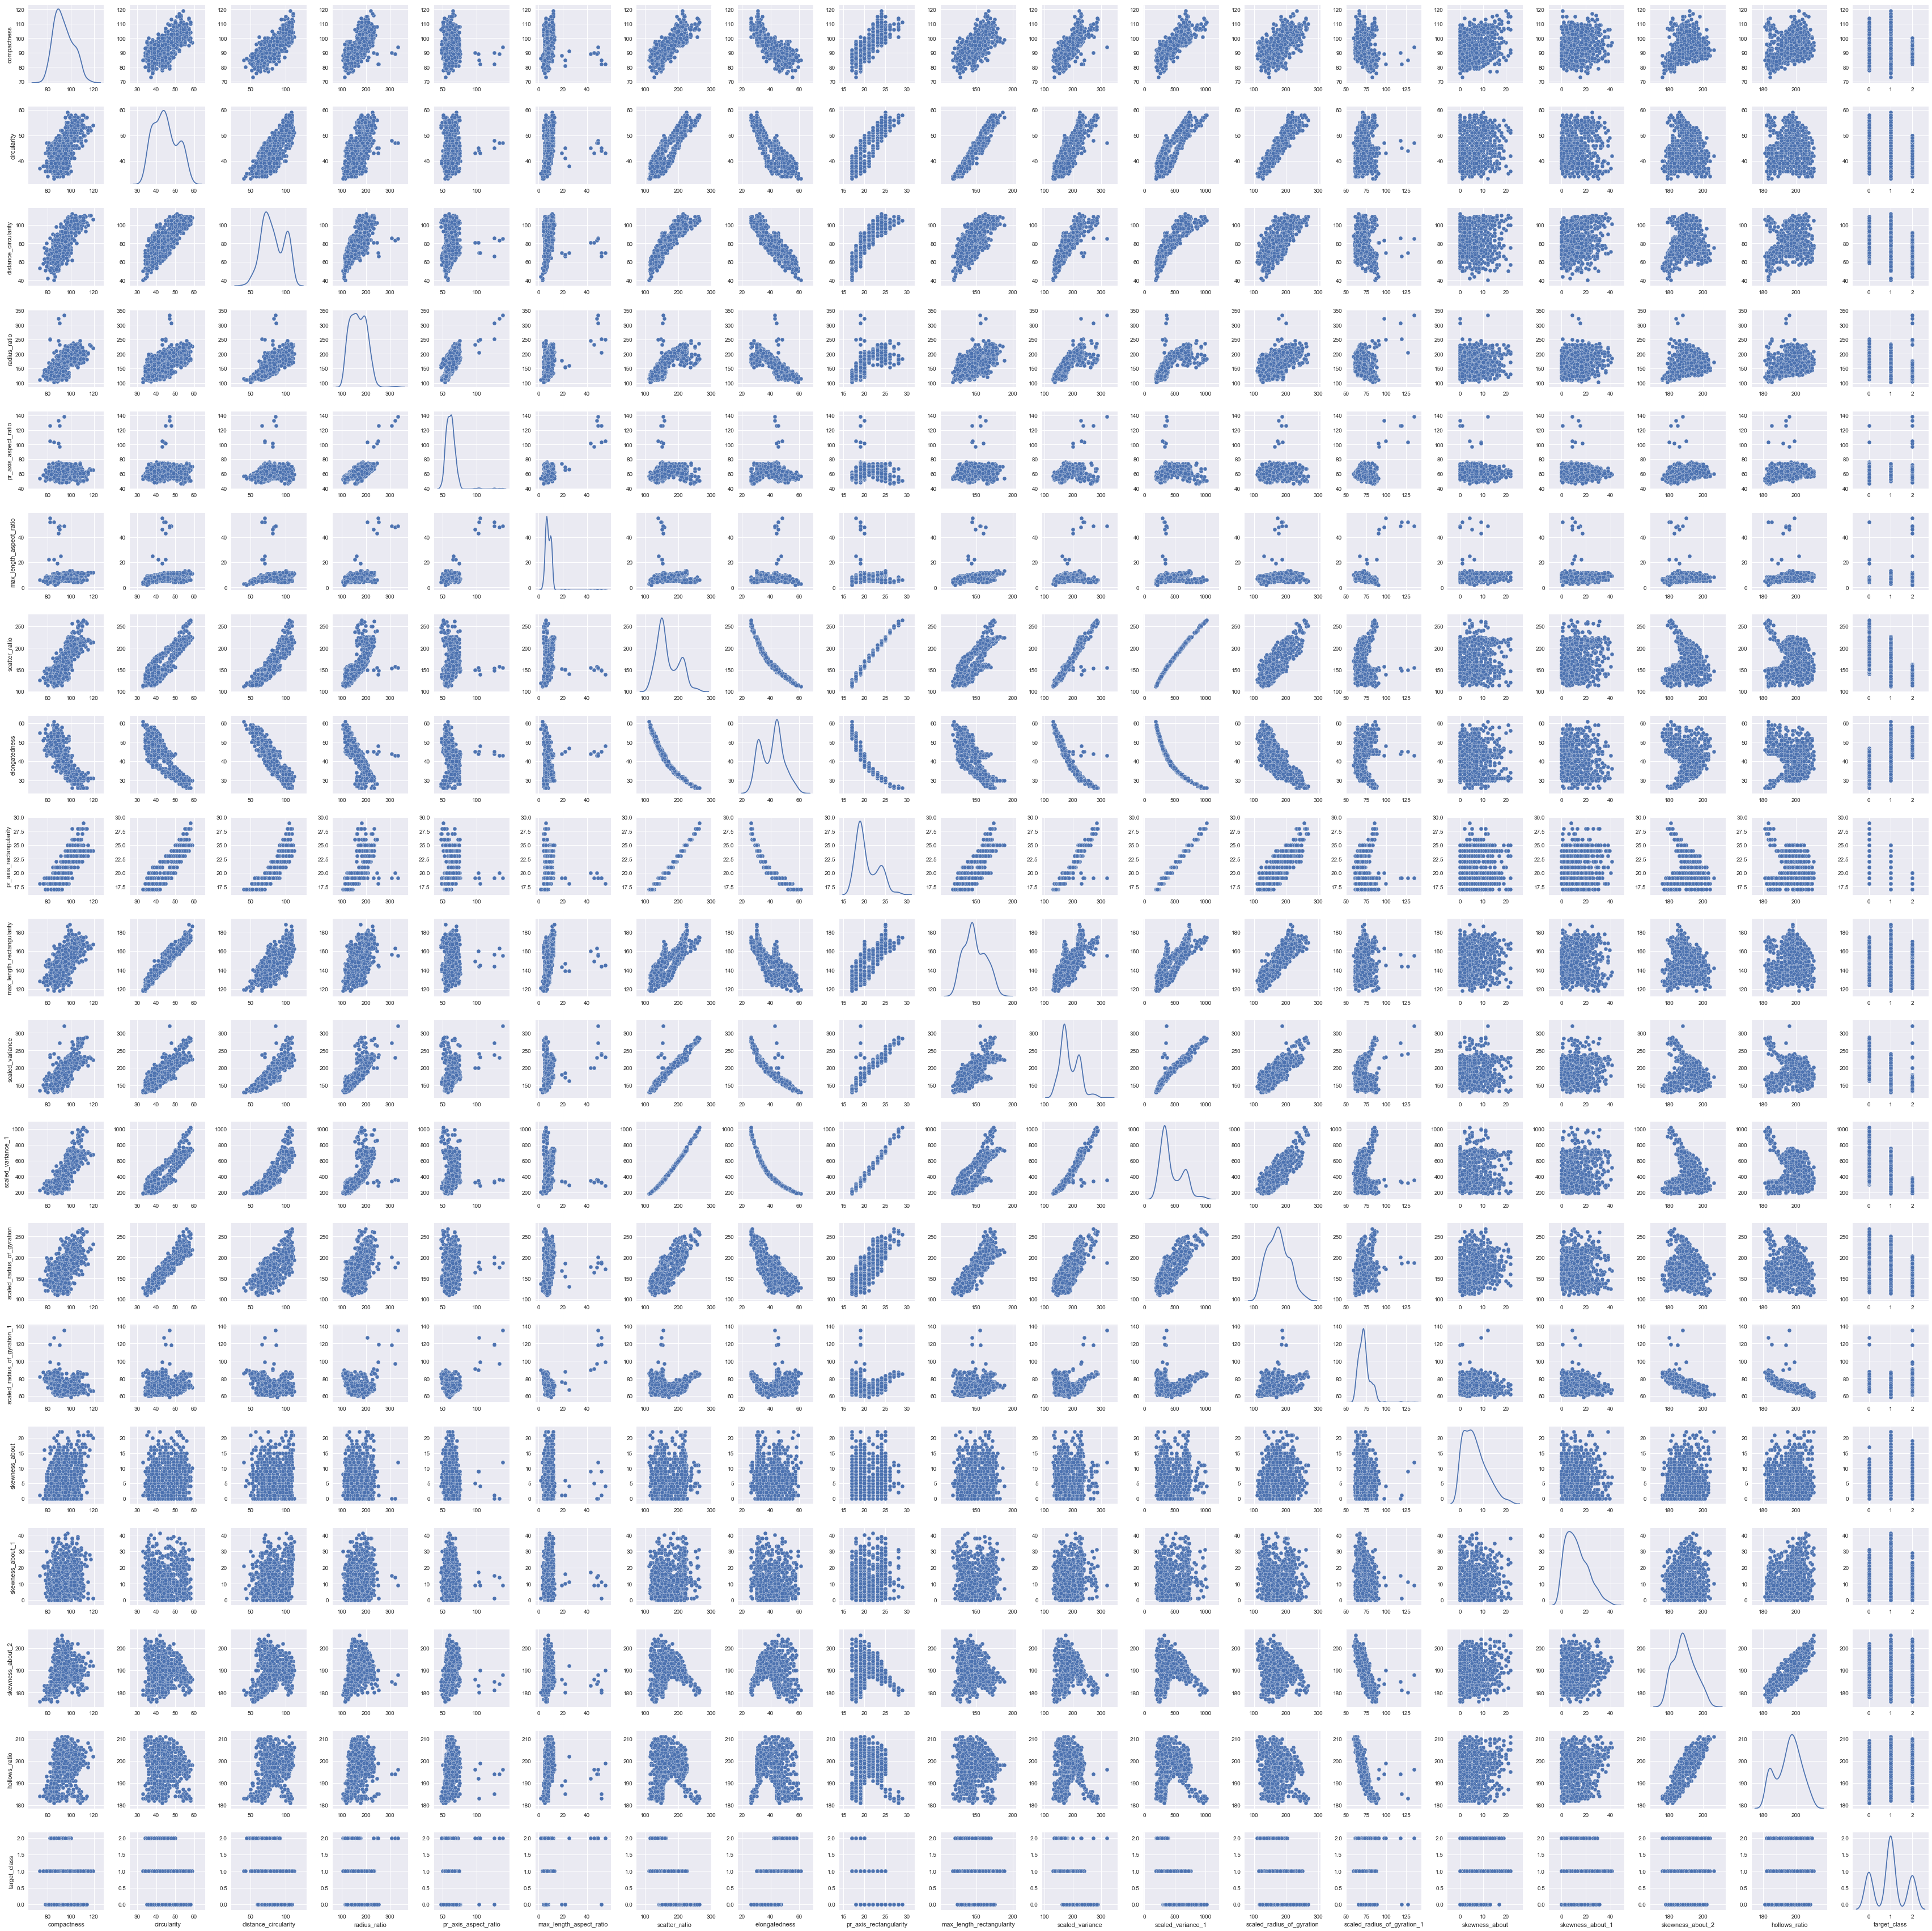

In [8]:
#Check the pairplot for relationship bewteen features.
sn.pairplot(dataSet,diag_kind='kde')

<b>Findings:</b> 
* compactness,  radius_ratio, pr_axis_aspect_ratio, scaled_radius_of_gyration & skewness_about_2 seems to be normal gaussian. 
* We can see around 3-9 clusters in the dataset.
* compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr_axis_rectangularity, 
max_length_rectangularity, scaled_variance, scaled_variance_1, scaled_radius_of_gyration - 
All these festures are <b>Positive Linear relationship </b> with other features.
* pr_axis_aspect_ratio, max_length_aspect_ratio, scaled_radius_of_gyration, scaled_radius_of_gyration_1, skewness_about, 
skewness_about_1 - All these festures are <b> not linearly related </b> with other features.
* elongatedness - It has <b>Negative Linear relationship </b> with other features.

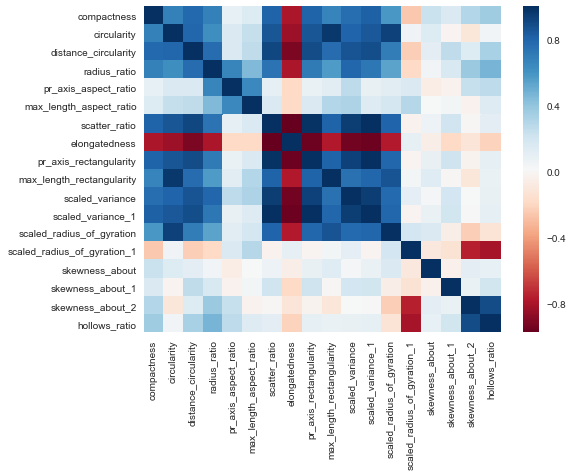

In [9]:
df_independent = dataSet.drop('target_class',1)
df_target = dataSet['target_class']
pearsoncorr = df_independent.corr(method='pearson')
plt.figure(figsize=(8, 6))
sn.heatmap(pearsoncorr, cmap="RdBu")

<b>Findings:</b> From the above pairplot and correlation chart the following columns are not linearly correlated. 
    Only those columns should be ignored for PCA analysis. Rest of the colunms will be considered for PCA.
    
    * 'pr_axis_aspect_ratio', 
    * 'max_length_aspect_ratio'
    * 'scaled_radius_of_gyration', 
    * 'scaled_radius_of_gyration_1'
    * 'skewness_about', 
    * 'skewness_about_1'

### Step 2.2:  Handling missing values 

#### Finding Missing Values

In [10]:
dataSet.isnull().apply(pd.value_counts) 

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about_2  hollows_ratio  target_class  
False               845          846.0         846.0  
True                  1            NaN           NaN

<b>Findings:</b> 

The following columns have null values - circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, 	scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1	,skewness_about, skewness_about.1, skewness_about.2

#### Fixing Missing Values

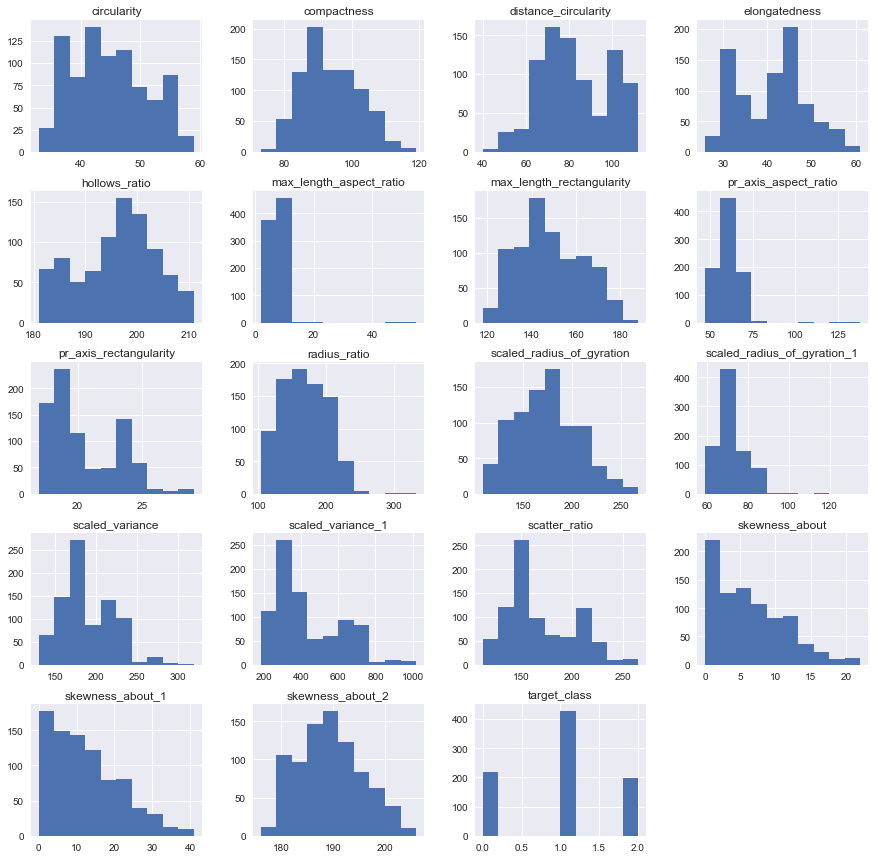

In [11]:
# Plot the columns to see distribution
dataSet.hist(figsize=(15,15))
plt.show()

In [12]:
#find skewness in the data to decide on to apply median or mean value to missing values.
for col_name in dataSet.columns[:-1]:
    print ("The skewness of {} is {:.2f}".format(col_name, dataSet[col_name].skew()))

The skewness of compactness is 0.38
The skewness of circularity is 0.26
The skewness of distance_circularity is 0.11
The skewness of radius_ratio is 0.39
The skewness of pr_axis_aspect_ratio is 3.83
The skewness of max_length_aspect_ratio is 6.78
The skewness of scatter_ratio is 0.61
The skewness of elongatedness is 0.05
The skewness of pr_axis_rectangularity is 0.77
The skewness of max_length_rectangularity is 0.26
The skewness of scaled_variance is 0.65
The skewness of scaled_variance_1 is 0.84
The skewness of scaled_radius_of_gyration is 0.28
The skewness of scaled_radius_of_gyration_1 is 2.08
The skewness of skewness_about is 0.78
The skewness of skewness_about_1 is 0.69
The skewness of skewness_about_2 is 0.25
The skewness of hollows_ratio is -0.23


<b>Findings:</b> All the missing column values are not normalized and it is positively skewed. 
    Hence median values needs to be applied to the missing values

In [13]:
#Fix missing values with imputer approach
imputer = Imputer(missing_values='NaN',strategy='median',axis=0)
dataSet.iloc[:,:-1] = imputer.fit_transform(dataSet.iloc[:,:-1])

/Users/preneeth/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### Validating the fix for Missing Values

In [14]:
dataSet.isnull().apply(pd.value_counts) 

compactness  circularity  distance_circularity  radius_ratio  \
False          846          846                   846           846   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
False                   846                      846            846   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
False            846                     846                        846   

       scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
False              846                846                        846   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
False                          846             846               846   

       skewness_about_2  hollows_ratio  target_class  
False               846            846           846

<b>Findings:</b> Post fixing the missing values there are no row for "True" value of null. That means the missing value is completely fixed in the dataset.

### Step 2.3: Handing Outliers

#### Finding Outliers

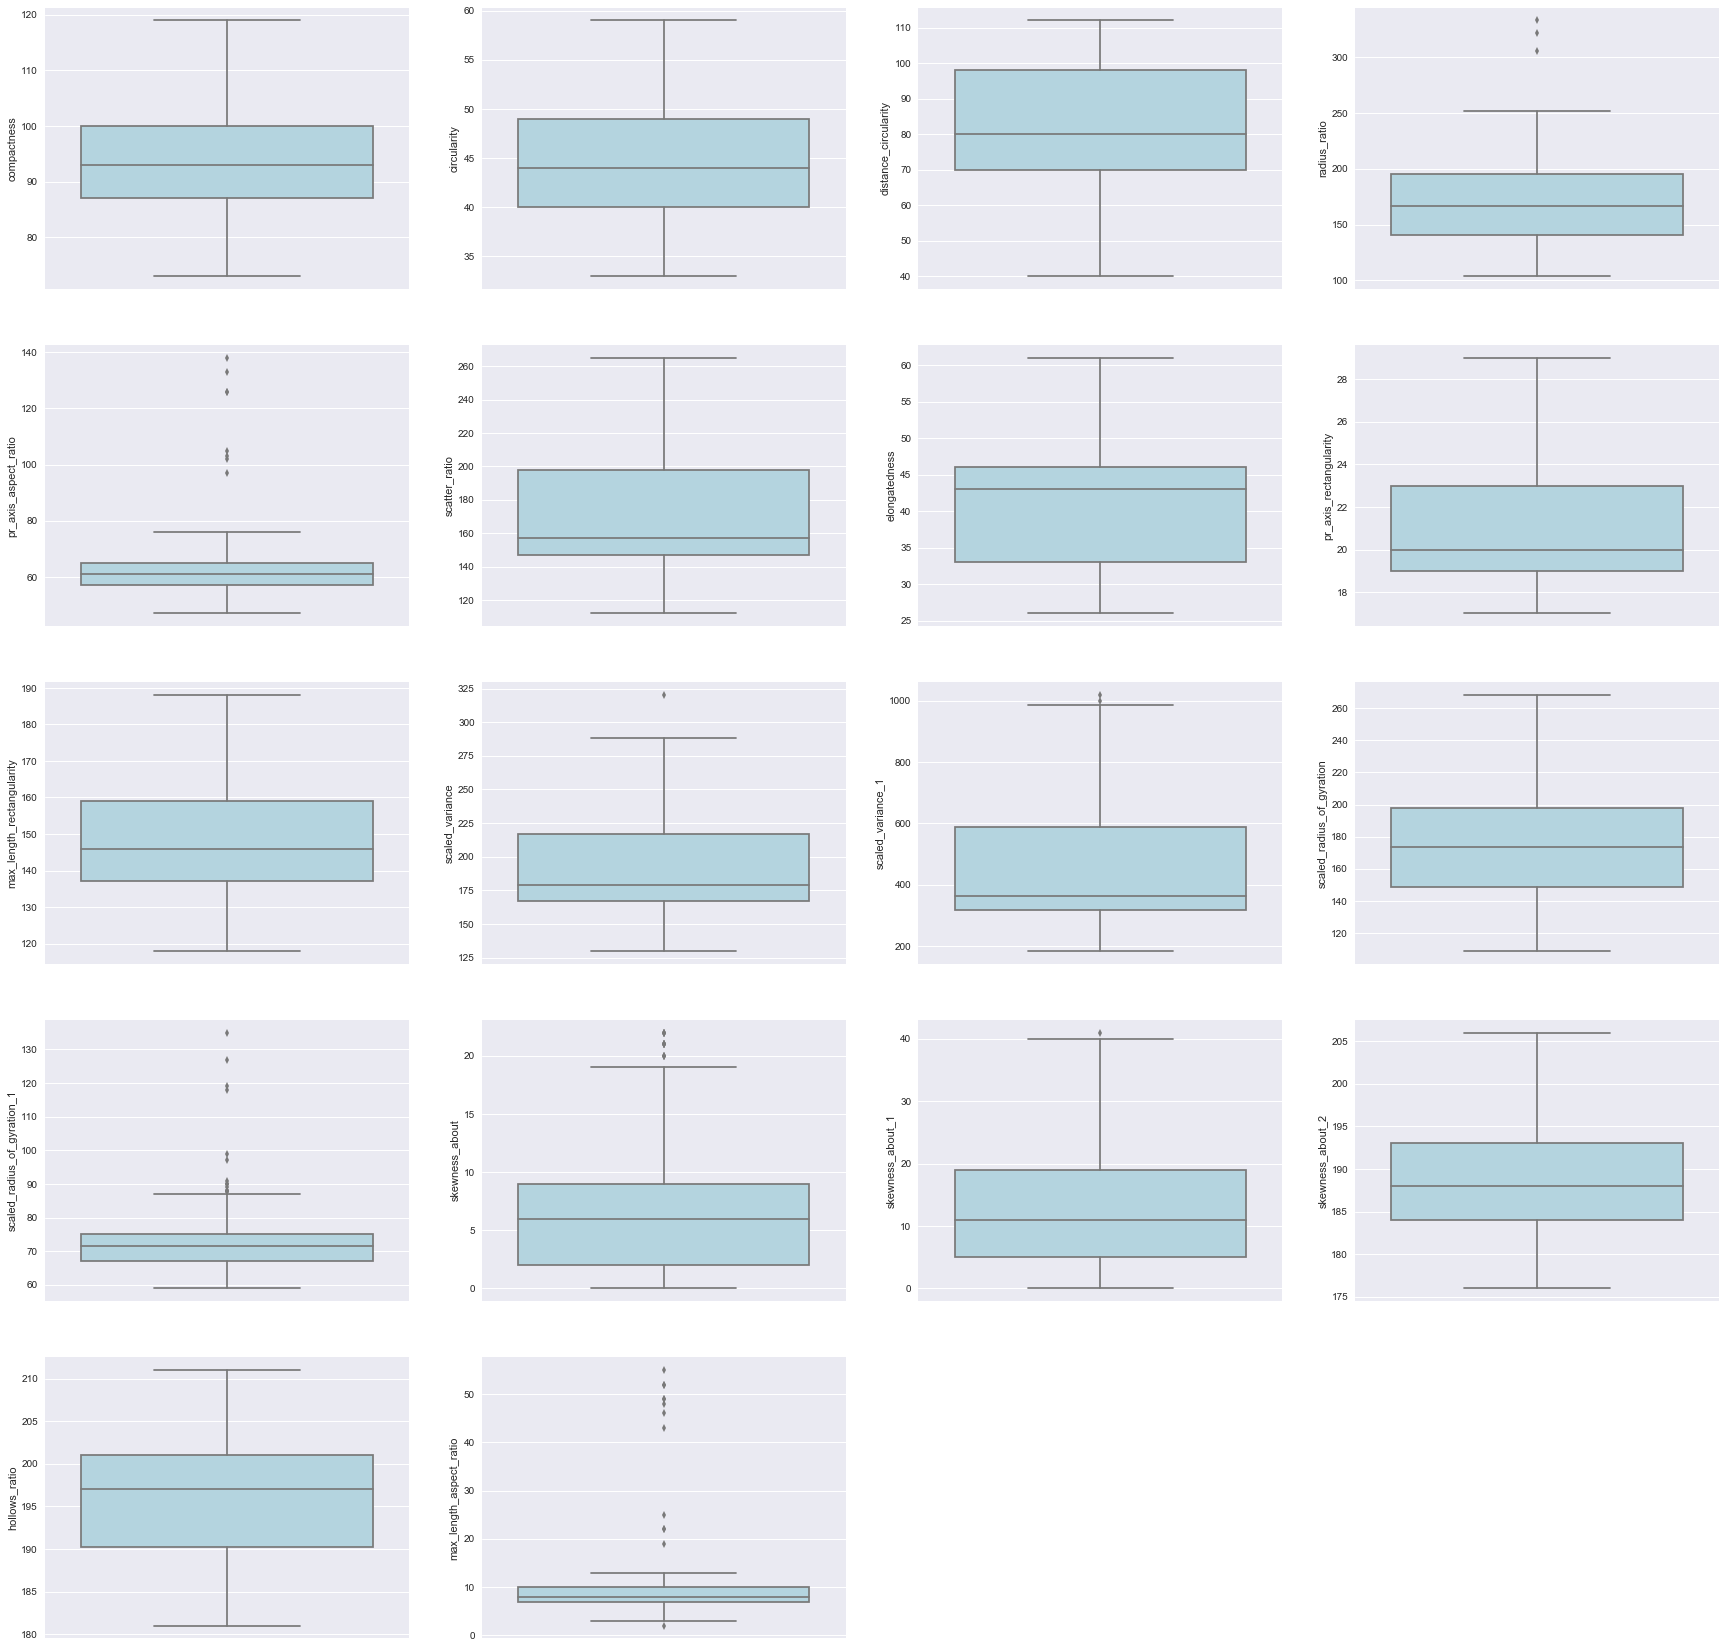

In [15]:
# Find outliers by boxplot.

plt.figure(figsize= (30,30))

plt.subplot(5,4,1)
sn.boxplot(x= dataSet.compactness, color='lightblue', orient='vertical')

plt.subplot(5,4,2)
sn.boxplot(x= dataSet.circularity, color='lightblue', orient='vertical')

plt.subplot(5,4,3)
sn.boxplot(x= dataSet.distance_circularity, color='lightblue', orient='vertical')

plt.subplot(5,4,4)
sn.boxplot(x= dataSet.radius_ratio, color='lightblue', orient='vertical')

plt.subplot(5,4,5)
sn.boxplot(x= dataSet.pr_axis_aspect_ratio, color='lightblue', orient='vertical')

plt.subplot(5,4,6)
sn.boxplot(x= dataSet.scatter_ratio, color='lightblue', orient='vertical')

plt.subplot(5,4,7)
sn.boxplot(x= dataSet.elongatedness, color='lightblue', orient='vertical')

plt.subplot(5,4,8)
sn.boxplot(x= dataSet.pr_axis_rectangularity, color='lightblue', orient='vertical')

plt.subplot(5,4,9)
sn.boxplot(x= dataSet.max_length_rectangularity, color='lightblue', orient='vertical')

plt.subplot(5,4,10)
sn.boxplot(x= dataSet.scaled_variance, color='lightblue', orient='vertical')

plt.subplot(5,4,11)
sn.boxplot(x= dataSet.scaled_variance_1, color='lightblue', orient='vertical')

plt.subplot(5,4,12)
sn.boxplot(x= dataSet.scaled_radius_of_gyration, color='lightblue', orient='vertical')

plt.subplot(5,4,13)
sn.boxplot(x= dataSet.scaled_radius_of_gyration_1, color='lightblue', orient='vertical')

plt.subplot(5,4,14)
sn.boxplot(x= dataSet.skewness_about, color='lightblue', orient='vertical')

plt.subplot(5,4,15)
sn.boxplot(x= dataSet.skewness_about_1, color='lightblue', orient='vertical')

plt.subplot(5,4,16)
sn.boxplot(x= dataSet.skewness_about_2, color='lightblue', orient='vertical')

plt.subplot(5,4,17)
sn.boxplot(x= dataSet.hollows_ratio, color='lightblue', orient='vertical')

plt.subplot(5,4,18)
sn.boxplot(x= dataSet.max_length_aspect_ratio, color='lightblue', orient='vertical')


plt.show()

<b>Findings:</b> There are outliers in "scaled_radius_of_gyration_1",  "max_length_aspect_ratio", "radius_ratio", "pr_axis_aspect_ratio", "scaled_variance", "scaled_variance_1", and "skewness_about". Need to fix the outliers in these 2 columns.

#### Fixing Outliers

In [16]:
#Function to replace outliers lying outside IQR range with median value.
def fixOutlier (dataSet, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    dataSet.loc[(col < min_value) | (col > max_value), col.name] = col.median()
    
# The above function is called for columns where outlier is identified.
fixOutlier(dataSet, dataSet.max_length_aspect_ratio)
fixOutlier(dataSet, dataSet.scaled_radius_of_gyration_1)
fixOutlier(dataSet, dataSet.radius_ratio)
fixOutlier(dataSet, dataSet.pr_axis_aspect_ratio)
fixOutlier(dataSet, dataSet.scaled_variance)
fixOutlier(dataSet, dataSet.scaled_variance_1)
fixOutlier(dataSet, dataSet.skewness_about)

#### Validating the fix for  outliers

In [17]:
#function to find outliers

def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    np.set_printoptions(precision=3)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    print ("The outlier values for column {} are {}".format(column.name, np.array(anomalies)))
    return 

# The above function is called for columns where outlier is identified.
findOutliers(dataSet.max_length_aspect_ratio)
findOutliers(dataSet.scaled_radius_of_gyration_1)
findOutliers(dataSet.radius_ratio)
findOutliers(dataSet.pr_axis_aspect_ratio)
findOutliers(dataSet.scaled_variance)
findOutliers(dataSet.scaled_variance_1)
findOutliers(dataSet.skewness_about)

The outlier values for column max_length_aspect_ratio are []
The outlier values for column scaled_radius_of_gyration_1 are []
The outlier values for column radius_ratio are []
The outlier values for column pr_axis_aspect_ratio are []
The outlier values for column scaled_variance are []
The outlier values for column scaled_variance_1 are []
The outlier values for column skewness_about are []


<b>Findings:</b> Post fixing the outliers there are no outliers at all. All the outlier arrays are empty for each column listed above

### Step 3: Test the SVM model without PCA

In [18]:
# Prepare the data for Model Execution

df_independent = dataSet.drop('target_class',1)
df_target = dataSet['target_class']

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_independent)

X = scaled_df
y = df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)


In [19]:
# A generic function to execute model, calculate model score and print confusion matrix
def executeModel(model, X_train, X_test, y_train, y_test ):
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    model_score_train = model.score(X_train, y_train)
    model_score = model.score(X_test, y_test)
   
    print(metrics.confusion_matrix( y_test,y_predict ))
    print(classification_report(y_test, y_predict))
    print('Accuracy model on test set: {:.2f}'.format(model_score))
    #print('Accuracy model on training set: {:.2f}'.format(model_score_train))
    return str(round(model_score,2))

In [20]:
# Execute the model
model = SVC(gamma= 'auto')
accuracy_without_PCA = executeModel (model, X_train, X_test, y_train, y_test)

[[ 65   1   0]
 [  1 124   2]
 [  1   1  59]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.98      0.98       127
           2       0.97      0.97      0.97        61

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254

Accuracy model on test set: 0.98


<b>Findings:</b>
    The accuracy of model with 18 attrubutes is 0.98

### Step 4: Test the SVM model  with PCA

### Step 4.1 Identify the Principle Components

In [21]:
# The following columns will be part of PCA, as they are linearly coorelated.
X_PCA = df_independent[['compactness','circularity','distance_circularity', 'radius_ratio', \
                        'scatter_ratio', 'elongatedness', 'pr_axis_rectangularity', \
                        'max_length_rectangularity', 'scaled_variance', 'scaled_variance_1', \
                        'skewness_about_2', 'hollows_ratio']]
# The following will not be part of PCA
X_Non_PCA = df_independent[['pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scaled_radius_of_gyration', \
                            'skewness_about', 'skewness_about_1', 'scaled_radius_of_gyration_1']] 
y = df_target


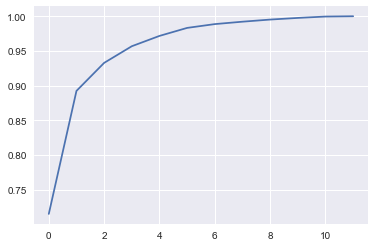

In [22]:
from sklearn.decomposition import PCA

scaled_df = scaler.fit_transform(X_PCA)
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


<b>Findings:</b> The above scree plot shows that first 8 Principle components has maximum information. i.e. 12 features are reduced to 8 PCs without losing major information.

### Step 4.2: Create data for modeling with identified PCs.

In [23]:

pca = PCA(n_components=8)

# Create a dataframe with 8 PC.
pca_df = pd.DataFrame(data = pca.fit_transform(scaled_df),
        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

#scale the other columns which was not considered for PCA.
X_Non_PCA_Z= scaler.fit_transform(X_Non_PCA)

# combine the 8 PCs to original dataframe
combine_df = pca_df.join(pd.DataFrame(X_Non_PCA_Z)) 


X = combine_df
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

### Step 4.3: Test the SVM model with PCA (reduced features)

In [24]:
# Train the model using PCA + other features
model = SVC(gamma= 'auto')
accuracy_with_PCA = executeModel (model, X_train, X_test, y_train, y_test)
combine_df.shape


[[ 65   1   0]
 [  1 122   4]
 [  1   1  59]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97       127
           2       0.94      0.97      0.95        61

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254

Accuracy model on test set: 0.97


(846, 14)

<b>Findings:</b>
    The accuracy of model with 14 features is 0.97. Note with reduced features also model is performing equally good.

### Step 5: Verify performance of Model with Cross Validation

### Step 5.1: Identify the best Hyper Parameters

In [25]:
# Function to identify best hyper Parameters
def svc_param_selection(X, y, param_grid, nfolds):
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

# set params 
Cs = [0.01, 0.05, 0.5, 1, 10]
gammas = ['auto', 'scale' ]
kernels = ['linear', 'rbf']
param_grid = [{'C': Cs, 'kernel': kernels, 'gamma': gammas }]
svc_param_selection(scaled_df, df_target,param_grid, 20)

/Users/preneeth/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

<b>Findings:</b>
    The best hyper parameter based on GridSearch is {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

### Step 5.2: SVM model with best hyper parameter and all attributes (without PCA)

In [26]:
model = SVC(C=10, gamma='auto', kernel='rbf')
#data supplied is all Attributes
scores = cross_val_score(model, scaled_df, df_target, cv=20)
score_without_pca = str(round(scores.mean(),2))
print("Model Accuracy with tuned hyper parameters : {} ".format(score_without_pca))

Model Accuracy with tuned hyper parameters : 0.95 


### Step 5.3: SVM model with best hyper parameter and with reduced attributes (with PCA)

In [27]:
model = SVC(C=10, gamma='auto', kernel='rbf')
#data supplied reduces attributes (PCA)
scores = cross_val_score (model, X_train, y_train, cv=20)
score_with_pca = str(round(scores.mean(),2))
print("Model Accuracy with tuned hyper parameters and PCs : {} ".format(score_with_pca))

Model Accuracy with tuned hyper parameters and PCs : 0.96 


### Step 6: Results & Conclusion

In [28]:
result = {'Model Types' : [ 'Model without PCA', 'Model with PCA'],
          'Attributes' : [df_independent.columns.get_values().size,combine_df.columns.get_values().size], \
          'Accuracy' : [accuracy_without_PCA, accuracy_with_PCA], \
          'Cross Validation' : [score_without_pca, score_with_pca]}
result_df = pd.DataFrame (result, columns=['Model Types','Attributes','Accuracy','Cross Validation'])

In [29]:
# Function to highlight the max values in dataframes columns.
def highlight_max(s):
    is_max = (s == s.max())  
    return ['background-color: cyan' if v else '' for v in is_max] 

result_df.style.apply(highlight_max, subset=['Accuracy', 'Cross Validation'])

<b>Conclusion:</b>
    The accuracy of the model is almost same with all attributes and reduced set of attributes. 
    So we can conclude that the PCA with reduced dimensionality is able to provide same results as with complete set of features/attributes.